In [1]:
# Lab17 Data Visualization - Taylor Johnson 12/1/2020

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# data from https://www.kaggle.com/epa/fuel-economy, https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles
df_mpg = pd.read_csv('mpg.csv')
df_co2 = pd.read_csv('co2.csv')

In [18]:
df_mpg.tail(3)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,0.0,29,32,30,0,0.0,0.0,14,13.84,13.3
38112,37687,2017,Volvo,XC90 FWD,Standard Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,50,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0


In [5]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Transmission Descriptor              15045 non-null  object 
 8   Engine Index                         38113 non-null  int64  
 9   Engine Descriptor                    22693 non-null  object 
 10  Engine Cylinders                     37977 non-null  float64
 11  Engine Displacement         

In [6]:
df_mpg.describe()

,Vehicle ID,Year,Engine Index,Engine Cylinders,Engine Displacement,City MPG (FT1),Unrounded City MPG (FT1),City MPG (FT2),Unrounded City MPG (FT2),City Gasoline Consumption (CD),...,Hours to Charge (240V),Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),City Range (FT2),Highway Range (FT2)
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,...,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,17.981109,4.606426,0.546218,0.386633,0.000432,...,0.027635,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,0.043973,0.040051
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,6.849728,10.113963,4.109282,3.861179,0.039976,...,0.473685,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,1.311628,1.169281
min,1.000000,1984.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19058.000000,2001.000000,212.000000,6.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28779.000000,2009.000000,4451.000000,6.000000,4.300000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38542.000000,2017.000000,69102.000000,16.000000,8.400000,150.000000,150.000000,145.000000,145.083500,5.350000,...,12.000000,7.000000,97.000000,81.000000,88.000000,315.000000,305.900000,346.900000,103.030000,90.550000


In [7]:
df_co2.head(3)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [8]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
df_co2.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


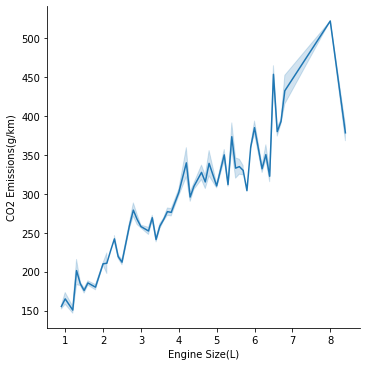

In [13]:
sns.relplot(
    data=df_co2, kind="line",
    x="Engine Size(L)", y="CO2 Emissions(g/km)"
    
)

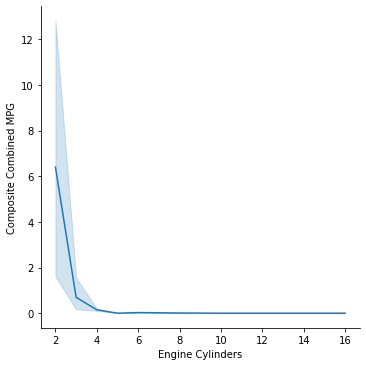

In [20]:
sns.relplot(
    data=df_mpg, kind="line",
    x="Engine Cylinders", y="Composite Combined MPG"
    
)

In [ ]:
#CO2 Observations: Co2 emssions appear to have a correlation to engine size. They have a linear relationship. Increased engine size leads to increased Co2 emissions.
#MPG Observations: MPG appears to have a correlation to engine cylinder count. They appear to be inversly related. As engine cylder count icnreases the combined MPG decreases. 
#It appears that larger engines with more cylinders produce more Co2 and get worse MPG and therefore are less effecient than smaller engines with less cylinders. 